In [ ]:
# ECGR 4105 Assignment 2
# Anthony Almonte
# #800916043
# 6/30/25

%matplotlib inline
import matplotlib.pyplot as plt # import libraries
import numpy as np
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ECGR 4105 csv/Housing.csv' # Google Drive file path
df = pd.DataFrame(pd.read_csv(file_path))

df.head() # obtains first 'n' rows from dataset, n=5
M=len(df)
df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
price = df.values[:, 0]   # values from: column #1 'price'
area = df.values[:, 1]    #              column #2 'area'
bed = df.values[:, 2]     #              column #3 'bedrooms'
bath = df.values[:, 3]    #              column #4 'bathrooms'
story = df.values[:, 4]   #              column #5 'stories'
park = df.values[:, 10]   #              column #10 'parking'

m = len(price)  # # training examples
n1 = len(area)
n2 = len(bed)
n3 = len(bath)
n4 = len(story)
n5 = len(park)

#print('Price = ', price[: 5])   # prints first 5 values
#print('Area = ', area[: 5])
#print('Bedrooms = ', bed[: 5])
#print('Bathrooms = ', bath[:5])
#print('Stories = ', story[:5])
#print('Parking = ', park[:5])
#print('m =', m)                 # total # training examples

In [ ]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] # yes/no columns

# binary conversion: yes to 1 and no to 0
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

#display(df.head()) # confirm conversion

mainrd = df.values[:,5] # values from columns 5-11
guest = df.values[:,6]
basement = df.values[:,7]
hotwater = df.values[:,8]
aircond = df.values[:,9]
prefarea = df.values[:,11]

In [ ]:
X_0 = np.ones((m, 1)) # column vector of ones
#X_0[:5]

In [ ]:
X_1 = area.reshape(m, 1).astype(float)  # reshaping features

X_2 = bed.reshape(m, 1).astype(float)   # convert to float to avoid 'dtype=object' error

X_3 = bath.reshape(m, 1).astype(float)

X_4 = story.reshape(m, 1).astype(float)

X_5 = park.reshape(m, 1).astype(float)

#X_5[:10]

In [ ]:
X_6 = mainrd.reshape(m, 1).astype(float)

X_7 = guest.reshape(m, 1).astype(float)

X_8 = basement.reshape(m, 1).astype(float)

X_9 = hotwater.reshape(m, 1).astype(float)

X_10 = aircond.reshape(m, 1).astype(float)

X_11 = prefarea.reshape(m, 1).astype(float)

In [ ]:
# Standardization:
# Features were causing numerical overflow,
# which resulted in errors. It is necessary
# to scale to a smaller range.

def scale_features(X):
    """
    (feature 'X' - mean) / standard deviation
    transforms original value into a
    standardized range.
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

X1_standard, mean1, std1 = scale_features(X_1) # standardized features
X2_standard, mean2, std2 = scale_features(X_2)
X3_standard, mean3, std3 = scale_features(X_3)
X4_standard, mean4, std4 = scale_features(X_4)
X5_standard, mean5, std5 = scale_features(X_5)

X6_standard, mean6, std6 = scale_features(X_6)
X7_standard, mean7, std7 = scale_features(X_7)
X8_standard, mean8, std8 = scale_features(X_8)
X9_standard, mean9, std9 = scale_features(X_9)
X10_standard, mean10, std10 = scale_features(X_10)
X11_standard, mean11, std11 = scale_features(X_11)

# horizontal stacking
S1 = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5))
S2 = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11))

S3 = np.hstack((X_0, X1_standard, X2_standard, X3_standard, X4_standard, X5_standard))
S5 = np.hstack((X_0, X1_standard, X2_standard, X3_standard, X4_standard, X5_standard, X6_standard, X7_standard, X8_standard, X9_standard, X10_standard, X11_standard))
#S1[:5]

In [ ]:
def normalize_features(X):
    """
    Min-max normalization
    using feature 'X' range 0-1
    """
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    X_norm = (X - min_val) / (max_val - min_val)
    return X_norm, min_val, max_val

X1_norm, min_val1, max_val1 = normalize_features(X_1) # normalized features
X2_norm, min_val2, max_val2 = normalize_features(X_2)
X3_norm, min_val3, max_val3 = normalize_features(X_3)
X4_norm, min_val4, max_val4 = normalize_features(X_4)
X5_norm, min_val5, max_val5 = normalize_features(X_5)

X6_norm, min_val6, max_val6 = normalize_features(X_6)
X7_norm, min_val7, max_val7 = normalize_features(X_7)
X8_norm, min_val8, max_val8 = normalize_features(X_8)
X9_norm, min_val9, max_val9 = normalize_features(X_9)
X10_norm, min_val10, max_val10 = normalize_features(X_10)
X11_norm, min_val11, max_val11 = normalize_features(X_11)

S4 = np.hstack((X_0, X1_norm, X2_norm, X3_norm, X4_norm, X5_norm))
S6 = np.hstack((X_0, X1_norm, X2_norm, X3_norm, X4_norm, X5_norm, X6_norm, X7_norm, X8_norm, X9_norm, X10_norm, X11_norm))

In [ ]:
from sklearn.model_selection import train_test_split
# 80% 20% split training and validation data

X_trainA, X_valA, y_trainA, y_valA = train_test_split(S1, price, test_size=0.2, train_size=0.8, random_state=42) # problem 1A

X_trainB, X_valB, y_trainB, y_valB = train_test_split(S2, price, test_size=0.2, train_size=0.8, random_state=42) # problem 1B

X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(S3, price, test_size=0.2, train_size=0.8, random_state=42) # problem 2A

X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(S4, price, test_size=0.2, train_size=0.8, random_state=42) # problem 2A

X_train_std2B, X_val_std2B, y_train_std2B, y_val_std2B = train_test_split(S5, price, test_size=0.2, train_size=0.8, random_state=42) # problem 2B

X_train_norm2B, X_val_norm2B, y_train_norm2B, y_val_norm2B = train_test_split(S6, price, test_size=0.2, train_size=0.8, random_state=42) # problem 2B

#print("Shape of training data (features):", X_train.shape)
#print("Shape of validation data (features):", X_val.shape)
#print("Shape of training data (target):", y_train.shape)
#print("Shape of validation data (target):", y_val.shape)

In [ ]:
# Functions provided by Vinit Katariya
def compute_cost(X, y, theta):

 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent(X, y, theta, alpha, iterations):

    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [ ]:
# **PROBLEM 3A and 3B**
# Modified compute_cost and gradient_descent functions.
# Includes the regularization parameter lambda
# to implement penalties.

def compute_cost_PP(X, y, theta, lamb=0):
    m = len(y)                   # lambda = 0,  no reg applied by default
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    reg_PP = (lamb / (2 * m)) * np.sum(np.square(theta[1:])) # regularization term
    J = J + reg_PP # total cost = sum of standard mean square errors + reg term

    return J

def gradient_descent_PP(X, y, theta, alpha, iterations, lamb=0):
    m = len(y)                                         # lambda = 0 by default
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)

        gradient = (1 / m) * X.transpose().dot(errors)

        reg_gradient = (lamb / m) * theta
        reg_gradient[0] = 0 # bias term theta[0] set to 0

        sum_delta = alpha * (gradient + reg_gradient)
        theta = theta - sum_delta # update theta
        cost_history[i] = compute_cost_PP(X, y, theta, lamb)

    return theta, cost_history

In [ ]:
theta = np.zeros(6) # parameters
thetaB = np.zeros(12)

iterations = 10000;
alpha = 0.000000001;

iterations_B = 2500;
alpha_B = 0.00000001;

iterations_std_2A = 3000;
alpha_std_2A = 0.3;

iterations_norm_2A = 1000;
alpha_norm_2A = 0.1;

iterations_norm_2B = 5000;
alpha_norm_2B = 0.5;

iterations_std_2B = 2500;
alpha_std_2B = 0.9;

theta_trainA, cost_history_trainA = gradient_descent(X_trainA, y_trainA, theta, alpha, iterations) # problem 1A
theta_valA, cost_history_valA = gradient_descent(X_valA, y_valA, theta, alpha, iterations)

theta_trainB, cost_history_trainB = gradient_descent(X_trainB, y_trainB, thetaB, alpha_B, iterations_B) # problem 1B
theta_valB, cost_history_valB = gradient_descent(X_valB, y_valB, thetaB, alpha_B, iterations_B)

theta_train2A, cost_history_train2A = gradient_descent(X_train_std, y_train_std, theta, alpha_std_2A, iterations_std_2A) # problem 2A standardization
theta_val2A, cost_history_val2A = gradient_descent(X_val_std, y_val_std, theta, alpha_std_2A, iterations_std_2A)

theta_train_2AN, cost_history_train_2AN = gradient_descent(X_train_norm, y_train_norm, theta, alpha_norm_2A, iterations_norm_2A) # problem 2A normalization
theta_val_2AN, cost_history_val_2AN = gradient_descent(X_val_norm, y_val_norm, theta, alpha_norm_2A, iterations_norm_2A)

theta_train2B, cost_history_train2B = gradient_descent(X_train_std2B, y_train_std2B, thetaB, alpha_std_2B, iterations_std_2B) # problem 2B standardization
theta_val2B, cost_history_val2B = gradient_descent(X_val_std2B, y_val_std2B, thetaB, alpha_std_2B, iterations_std_2B)

theta_train_2ANB, cost_history_train_2ANB = gradient_descent(X_train_norm2B, y_train_norm2B, thetaB, alpha_norm_2B, iterations_norm_2B) # problem 2B normalization
theta_val_2ANB, cost_history_val_2ANB = gradient_descent(X_val_norm2B, y_val_norm2B, thetaB, alpha_norm_2B, iterations_norm_2B)

#print('Final value of theta =', theta1) # Final theta

#print('cost_history =', cost_history1[-1]) # can be used to get min. value of cost function

# **PROBLEM 1A**

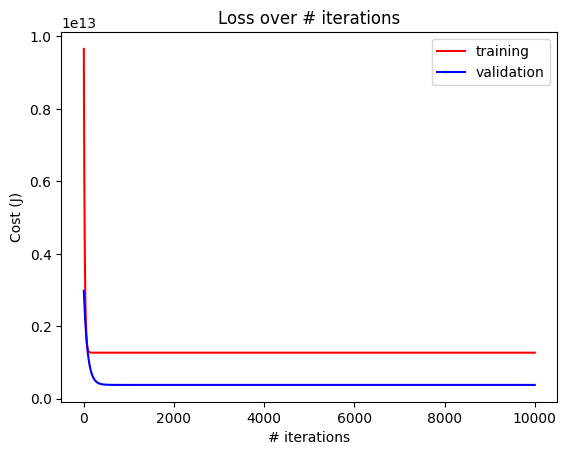

In [ ]:
plt.plot(range(1, iterations + 1),cost_history_trainA, color='red', label = 'training')  # Gradient Descent without
plt.plot(range(1, iterations + 1),cost_history_valA, color='blue', label = 'validation') # normalization or standardization

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations')
plt.legend();

# **PROBLEM 1B**

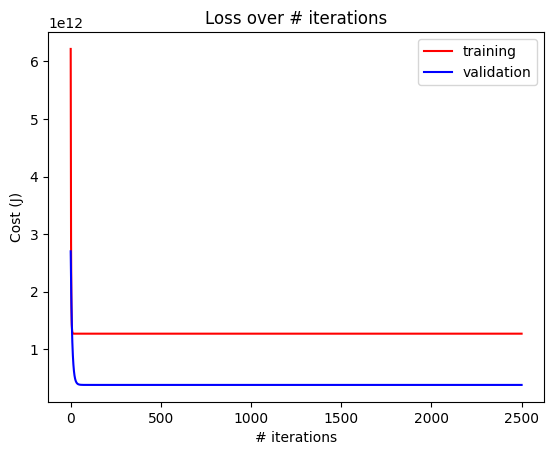

In [ ]:
plt.plot(range(1, iterations_B + 1),cost_history_trainB, color='red', label = 'training')  # Gradient Descent without
plt.plot(range(1, iterations_B + 1),cost_history_valB, color='blue', label = 'validation') # normalization or standardization
                                                                                           # includes all variables (except for furnishing)
plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations')
plt.legend();

# **PROBLEM 2A**

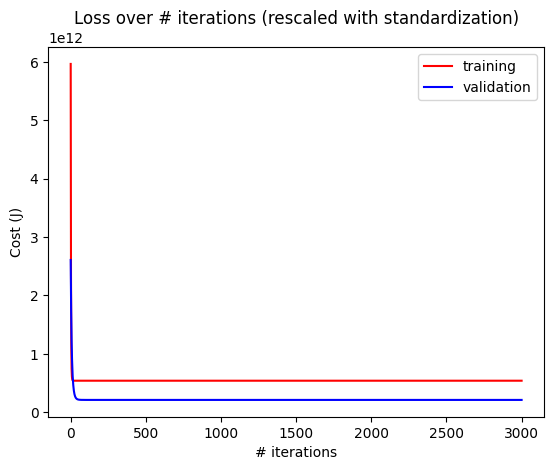

In [ ]:
plt.plot(range(1, iterations_std_2A + 1),cost_history_train2A, color='red', label = 'training')    # Gradient Descent, applying standardization
plt.plot(range(1, iterations_std_2A + 1),cost_history_val2A, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (rescaled with standardization)')
plt.legend();

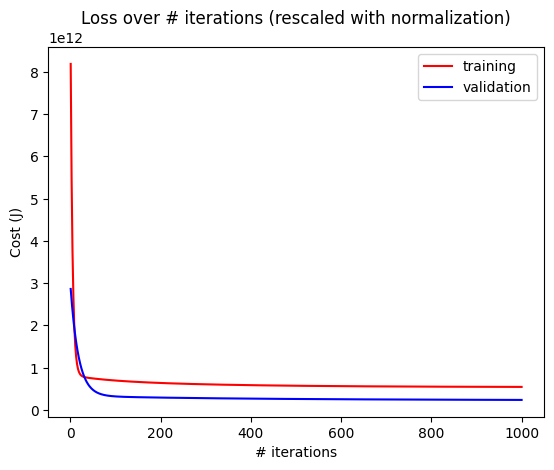

In [ ]:
plt.plot(range(1, iterations_norm_2A + 1),cost_history_train_2AN, color='red', label = 'training')    # Gradient Descent, applying normalization
plt.plot(range(1, iterations_norm_2A + 1),cost_history_val_2AN, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (rescaled with normalization)')
plt.legend();

# **PROBLEM 2B**

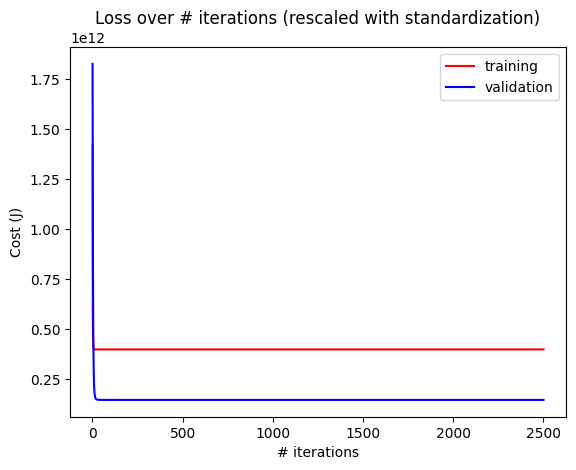

In [ ]:
plt.plot(range(1, iterations_std_2B + 1),cost_history_train2B, color='red', label = 'training')    # Gradient Descent, applying standardization
plt.plot(range(1, iterations_std_2B + 1),cost_history_val2B, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (rescaled with standardization)')
plt.legend();

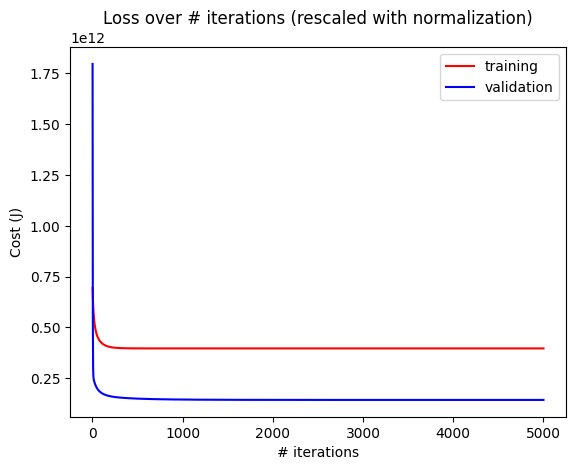

In [ ]:
plt.plot(range(1, iterations_norm_2B + 1),cost_history_train_2ANB, color='red', label = 'training')    # Gradient Descent, applying normalization
plt.plot(range(1, iterations_norm_2B + 1),cost_history_val_2ANB, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (rescaled with normalization)')
plt.legend();

# **PROBLEM 3A**

In [ ]:
theta3A = np.zeros(6)
theta3B = np.zeros(12)

alpha3A = 0.01;
alpha3B = 0.01;

iterate3A = 2000;
iterate3B = 1000;

lamb3A = 0.5;
lamb3B = 0.1;

theta_train3A, cost_history_PP3A = gradient_descent_PP(X_train_norm, y_train_norm, theta3A, alpha3A, iterate3A, lamb3A) # problem 3A penalty parameters applied
theta_val3A, cost_val_3A = gradient_descent_PP(X_val_norm, y_val_norm, theta3A, alpha3A, iterate3A)

theta_train3A2, cost_history_PP3A2 = gradient_descent_PP(X_train_std, y_train_std, theta3A, alpha3A, iterate3A, lamb3A) # problem 3A
theta_val3A2, cost_val_3A2 = gradient_descent_PP(X_val_std, y_val_std, theta3A, alpha3A, iterate3A)

theta_train3B, cost_history_PP3B = gradient_descent_PP(X_train_norm2B, y_train_norm2B, theta3B, alpha3B, iterate3B, lamb3B) # problem 3B penalty parameters applied
theta_val3B, cost_val_3B = gradient_descent_PP(X_val_norm2B, y_val_norm2B, theta3B, alpha3B, iterate3B)

theta_train3B2, cost_history_PP3B2 = gradient_descent_PP(X_train_std2B, y_train_std2B, theta3B, alpha3B, iterate3B, lamb3B) # problem 3B
theta_val3B2, cost_val3B2 = gradient_descent(X_val_std2B, y_val_std2B, theta3B, alpha3B, iterate3B)


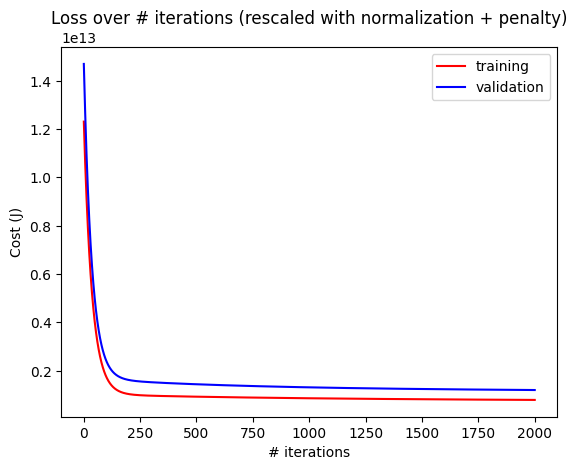

In [ ]:
plt.plot(range(1, iterate3A + 1),cost_history_PP3A, color='red', label = 'training') # Gradient Descent, penalty parameters applied
plt.plot(range(1, iterate3A + 1),cost_val_3A, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (rescaled with normalization + penalty)')
plt.legend();

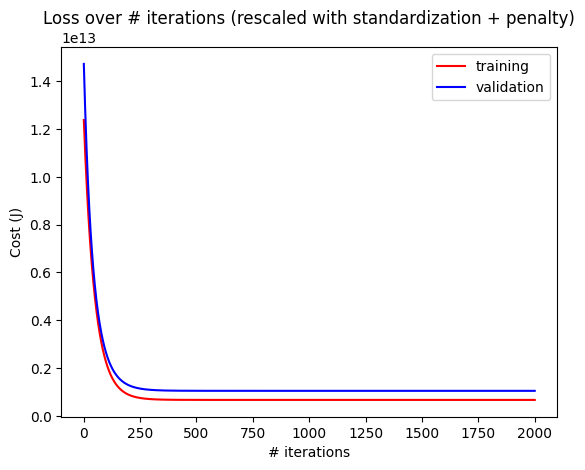

In [ ]:
plt.plot(range(1, iterate3A + 1),cost_history_PP3A2, color='red', label = 'training') # Gradient Descent, penalty parameters applied
plt.plot(range(1, iterate3A + 1),cost_val_3A2, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (rescaled with standardization + penalty)')
plt.legend();

# **PROBLEM 3B**

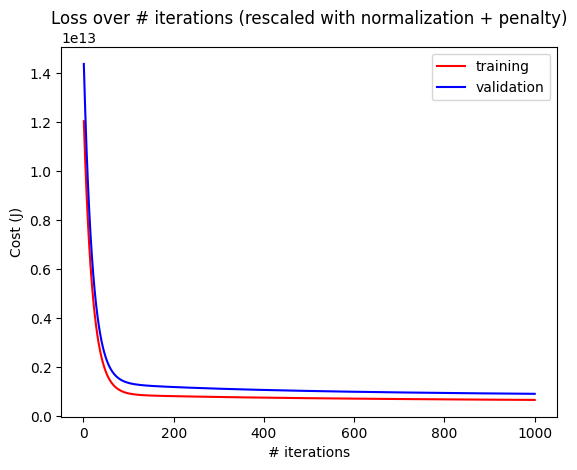

In [ ]:
plt.plot(range(1, iterate3B + 1),cost_history_PP3B, color='red', label = 'training') # Gradient Descent, penalty parameters applied
plt.plot(range(1, iterate3B + 1),cost_val_3B, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (rescaled with normalization + penalty)')
plt.legend();

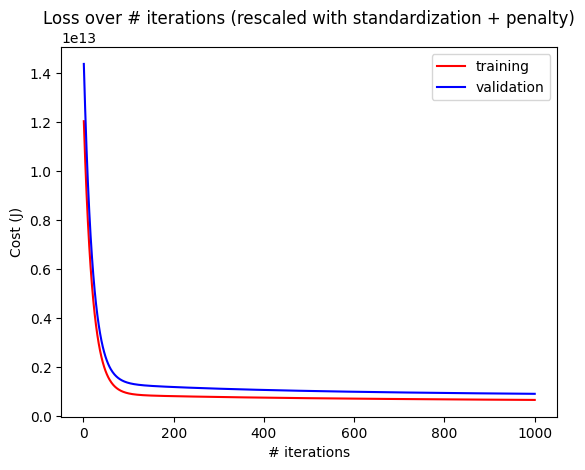

In [ ]:
plt.plot(range(1, iterate3B + 1),cost_history_PP3B, color='red', label = 'training') # Gradient Descent, penalty parameters applied
plt.plot(range(1, iterate3B + 1),cost_val_3B, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (rescaled with standardization + penalty)')
plt.legend();